In [1]:
import torch
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt

In [2]:
def load_nc(path):
    x_load = xr.open_dataset(path, engine="netcdf4")
    pt_load = torch.from_numpy(x_load.to_array().to_numpy()).transpose(0, 1)
    return (pt_load)

In [3]:
data_folder = "/home/kdaust/Masters/spat_gen/"

g1 = load_nc(data_folder + "coarse_train_g1.nc")
g2 = load_nc(data_folder + "coarse_train_g2.nc")
g3 = load_nc(data_folder + "coarse_train_g3.nc")
train_all = torch.cat([g1,g2,g3], dim = 0)
train_all.shape
torch.save(train_all,data_folder + "coarse_train_all.pt")

In [26]:
inv = torch.load(data_folder + "hr_topo_all.pt")


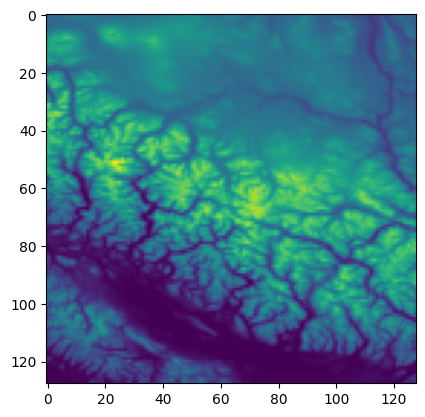

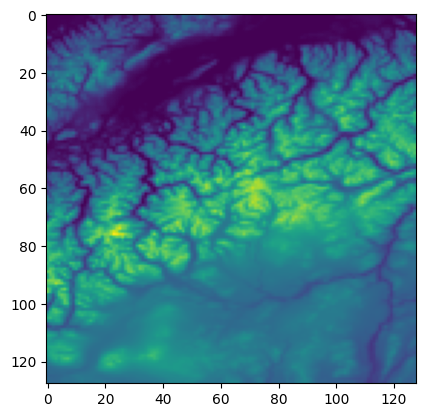

In [39]:

plt.imshow(inv[5,0,...])
plt.show()
invariant2 = torch.flip(inv,dims=[2])
plt.imshow(invariant2[5,0,...])

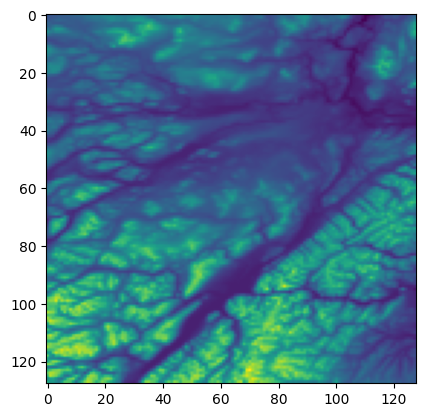

In [40]:
plt.imshow(invariant2[20000,0,...])

In [46]:
torch.save(invariant2,data_folder+"hr_topo_fixedrot.pt")

In [7]:
g1 = load_nc(data_folder + "coarse_test_g1.nc")
g2 = load_nc(data_folder + "coarse_test_g2.nc")
g3 = load_nc(data_folder + "coarse_test_g3.nc")
test_all = torch.cat([g1,g2,g3], dim = 0)
print(test_all.shape)
torch.save(test_all,data_folder + "coarse_test_all.pt")

torch.Size([26280, 4, 16, 16])


In [8]:
g1 = load_nc(data_folder + "fine_test_g1.nc")
g2 = load_nc(data_folder + "fine_test_g2.nc")
g3 = load_nc(data_folder + "fine_test_g3.nc")
test_all = torch.cat([g1,g2,g3], dim = 0)
print(test_all.shape)
torch.save(test_all,data_folder + "fine_test_all.pt")

torch.Size([26280, 2, 128, 128])


In [9]:
g1 = load_nc(data_folder + "fine_train_g1.nc")
g2 = load_nc(data_folder + "fine_train_g2.nc")
g3 = load_nc(data_folder + "fine_train_g3.nc")
train_all = torch.cat([g1,g2,g3], dim = 0)
train_all.shape
torch.save(train_all,data_folder + "fine_train_all.pt")

In [7]:
test = torch.load("/home/kdaust/Masters/ds_wind_full/invar_train_rot.pt")
t2 = torch.load("/home/kdaust/Masters/ds_wind_full/fine_train_rot.pt")

In [5]:
test.shape[0]/4

6576.0

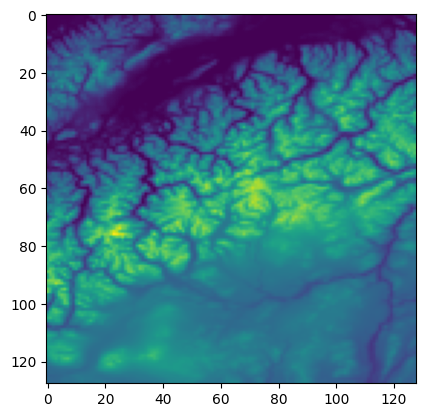

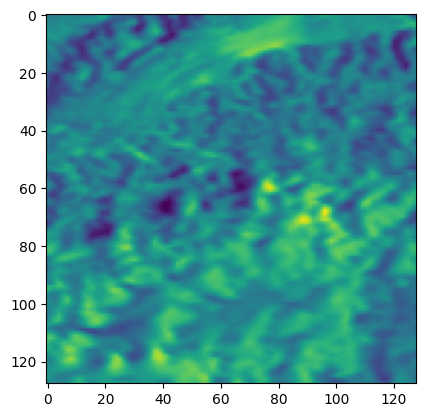

In [10]:

plt.imshow(test[42,0,...])
plt.show()
plt.imshow(t2[250,0,...])

In [2]:
data_folder = "/home/kdaust/Masters/ds_wind_full/"
coarse_train = xr.open_dataset(data_folder + "coarse_train.nc", engine="netcdf4")
fine_train = xr.open_dataset(data_folder + "fine_train.nc", engine="netcdf4")
coarse_test = xr.open_dataset(data_folder + "coarse_test.nc", engine="netcdf4")
fine_test = xr.open_dataset(data_folder + "fine_test.nc", engine="netcdf4")
invarient = torch.load(data_folder + "hr_topo.pt").unsqueeze(0)

In [5]:
coarse_train = torch.from_numpy(coarse_train.to_array().to_numpy()).transpose(0, 1)
fine_train = torch.from_numpy(fine_train.to_array().to_numpy()).transpose(0, 1)
coarse_test = torch.from_numpy(coarse_test.to_array().to_numpy()).transpose(0, 1)
fine_test = torch.from_numpy(fine_test.to_array().to_numpy()).transpose(0, 1)

In [21]:
fine_test.shape

torch.Size([17544, 2, 128, 128])

In [8]:
inv_train = invarient.repeat(fine_train.shape[0],1,1,1)
inv_train.shape
inv_test = invarient.repeat(fine_test.shape[0],1,1,1)
inv_test.shape

torch.Size([17544, 1, 128, 128])

In [15]:
ind0 = np.arange(0,fine_train.shape[0],4)
ind90 = np.arange(1,fine_train.shape[0],4)
ind180 = np.arange(2,fine_train.shape[0],4)
ind270 = np.arange(3,fine_train.shape[0],4)
print(ind90)
print(ind270)

[    1     5     9 ... 26293 26297 26301]
[    3     7    11 ... 26295 26299 26303]


In [10]:
t90f = torch.rot90(fine_train[ind90,...], k = 1, dims = (2,3))
t90c = torch.rot90(coarse_train[ind90,...], k = 1, dims = (2,3))

t180f = torch.rot90(fine_train[ind180,...], k = 2, dims = (2,3))
t180c = torch.rot90(coarse_train[ind180,...], k = 2, dims = (2,3))

t270f = torch.rot90(fine_train[ind270,...], k = 3, dims = (2,3))
t270c = torch.rot90(coarse_train[ind270,...], k = 3, dims = (2,3))


In [16]:
t0f = fine_train[ind0,...]
t0c = coarse_train[ind0,...]

In [17]:
inv_0 = invarient.repeat(t0f.shape[0],1,1,1)
inv_90 = torch.rot90(invarient, k = 1, dims = (1,2)).repeat(t90f.shape[0],1,1,1)
inv_180 = torch.rot90(invarient, k = 2, dims = (1,2)).repeat(t180f.shape[0],1,1,1)
inv_270 = torch.rot90(invarient, k = 3, dims = (1,2)).repeat(t270f.shape[0],1,1,1)
fine_train_rot = torch.cat([t0f,t90f,t180f,t270f],dim = 0)
coarse_train_rot = torch.cat([t0c,t90c,t180c,t270c],dim = 0)
invar_train_rot = torch.cat([inv_0,inv_90,inv_180,inv_270],dim = 0)

In [19]:
print(fine_train_rot.shape)
print(coarse_train_rot.shape)
print(invar_train_rot.shape)

torch.Size([26304, 2, 128, 128])
torch.Size([26304, 4, 16, 16])
torch.Size([26304, 1, 128, 128])


In [20]:
torch.save(fine_train_rot,data_folder+"fine_train_rot.pt")
torch.save(coarse_train_rot,data_folder+"coarse_train_rot.pt")
torch.save(invar_train_rot,data_folder+"invar_train_rot.pt")

In [23]:
ind0 = np.arange(0,fine_test.shape[0],4)
ind90 = np.arange(1,fine_test.shape[0],4)
ind180 = np.arange(2,fine_test.shape[0],4)
ind270 = np.arange(3,fine_test.shape[0],4)

t0f = fine_test[ind0,...]
t0c = coarse_test[ind0,...]

t90f = torch.rot90(fine_test[ind90,...], k = 1, dims = (2,3))
t90c = torch.rot90(coarse_test[ind90,...], k = 1, dims = (2,3))

t180f = torch.rot90(fine_test[ind180,...], k = 2, dims = (2,3))
t180c = torch.rot90(coarse_test[ind180,...], k = 2, dims = (2,3))

t270f = torch.rot90(fine_test[ind270,...], k = 3, dims = (2,3))
t270c = torch.rot90(coarse_test[ind270,...], k = 3, dims = (2,3))

inv_0 = invarient.repeat(t0f.shape[0],1,1,1)
inv_90 = torch.rot90(invarient, k = 1, dims = (1,2)).repeat(t90f.shape[0],1,1,1)
inv_180 = torch.rot90(invarient, k = 2, dims = (1,2)).repeat(t180f.shape[0],1,1,1)
inv_270 = torch.rot90(invarient, k = 3, dims = (1,2)).repeat(t270f.shape[0],1,1,1)
fine_test_rot = torch.cat([t0f,t90f,t180f,t270f],dim = 0)
coarse_test_rot = torch.cat([t0c,t90c,t180c,t270c],dim = 0)
invar_test_rot = torch.cat([inv_0,inv_90,inv_180,inv_270],dim = 0)

print(fine_test_rot.shape)
print(coarse_test_rot.shape)
print(invar_test_rot.shape)

torch.Size([17544, 2, 128, 128])
torch.Size([17544, 4, 16, 16])
torch.Size([17544, 1, 128, 128])


In [24]:
torch.save(fine_test_rot,data_folder+"fine_test_rot.pt")
torch.save(coarse_test_rot,data_folder+"coarse_test_rot.pt")
torch.save(invar_test_rot,data_folder+"invar_test_rot.pt")

In [1]:
print(fine_test_rot.shape)

NameError: name 'fine_test_rot' is not defined

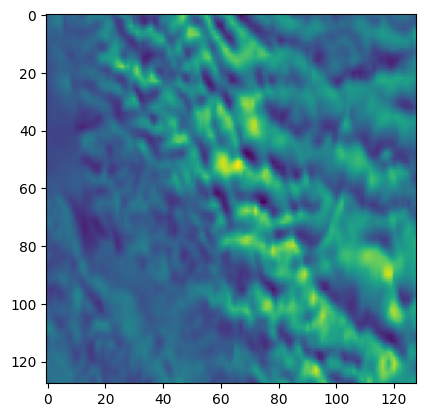

In [10]:
plt.imshow(rot90_done[42,0,...])